In [2]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [115]:
# load dataset
dataset = pd.read_csv("data/4SEP-all - Sheet1.csv")


In [116]:
dataset.columns

Index(['Aggregated_RTT_AVG', 'Aggregated_RTT_stdev', 'RTT_avg', 'RTT_stdev',
       'Duplicate_acks', 'Triple_dupacks', 'Max_retrans', 'Min_retr_time',
       'Max_retr_time', 'Avg_retr_time', 'Sdv_retr_time', 'Outoforder_pkts',
       'Experience', 'Resolutions', 'Total_Stall_Events', 'Avg_Bit_Rate',
       'Min_Rate', 'Max_Rate', 'Shifts_Quality', '320x240', '384x288',
       '512x384', '512x384.1', '640x480', '720x480', '1280x720', '1280x720.1',
       '1920x1080', '1920x1080.1', 'Avg_stall', 'Min_stall', 'Max_tall',
       'Total_Stalls', 'Segments_High_or_Low_Resolutions', 'Segments_in_Low',
       'Segments_in_High', 'lresolutionsbystall', 'Bandwidth', 'Packetloss',
       'Hosts_Competitions', 'MPD', 'Total_Packets', 'Througput',
       'RTT_Samples'],
      dtype='object')

In [117]:
dataset = dataset[(dataset['Experience'] != 'remove')]

In [118]:
dataset.shape

(1788, 44)

In [119]:
#dataset = dataset[(dataset['Hosts_Competitions']=='Low')]

In [120]:
dataset.head()

,Aggregated_RTT_AVG,Aggregated_RTT_stdev,RTT_avg,RTT_stdev,Duplicate_acks,Triple_dupacks,Max_retrans,Min_retr_time,Max_retr_time,Avg_retr_time,...,Segments_in_Low,Segments_in_High,lresolutionsbystall,Bandwidth,Packetloss,Hosts_Competitions,MPD,Total_Packets,Througput,RTT_Samples
0,0.98,5.98,0.9,5.7,1257,196,0,0.0,0.0,0.0,...,2,43,Stall_in_Stream,Low,Small Medium,Low,BIG_BUCK_BUNNY,12304,262445,9870
1,0.44,3.30,0.4,3.2,1609,302,0,0.0,0.0,0.0,...,3,42,Stall_in_Stream,Low,Medium,Low,BIG_BUCK_BUNNY,12141,246214,8658
2,0.24,2.18,0.3,2.6,1,0,0,0.0,0.0,0.0,...,6,39,Stall_in_Stream,Low,No,Low,BIG_BUCK_BUNNY,9119,206295,8632
3,0.98,5.98,0.9,5.8,1251,210,0,0.0,0.0,0.0,...,3,42,Stall_in_Stream,Low,Small Medium,Low,BIG_BUCK_BUNNY,11594,247162,9233
4,0.24,2.18,0.2,1.8,1,0,0,0.0,0.0,0.0,...,3,42,Stall_in_Stream,Low,No,Low,BIG_BUCK_BUNNY,11496,258651,10825


In [121]:
#y_pred = (y_pred > 0.5) 

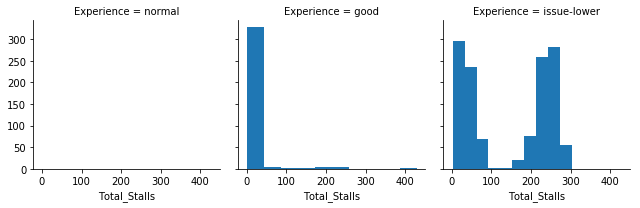

In [122]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stalls')

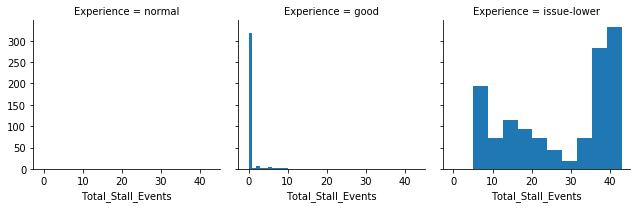

In [123]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stall_Events')

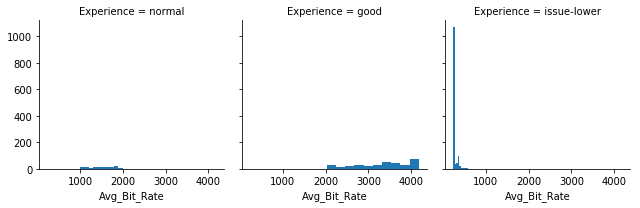

In [124]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Avg_Bit_Rate')

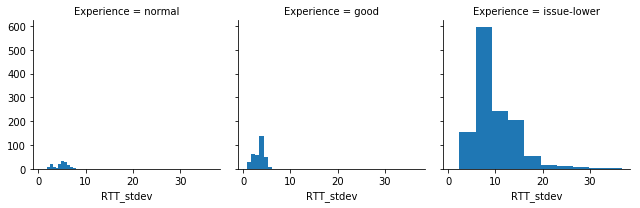

In [125]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'RTT_stdev')

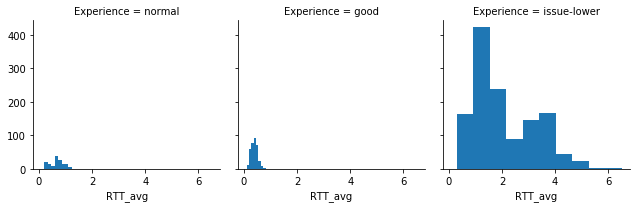

In [126]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'RTT_avg')

In [127]:
myP = ["#c26b00", "#242526", "#82096e", "#103009", "#34495e", "#c26b00", "#c2a200", "#0015b8", "#78282a", "#fc030b"]


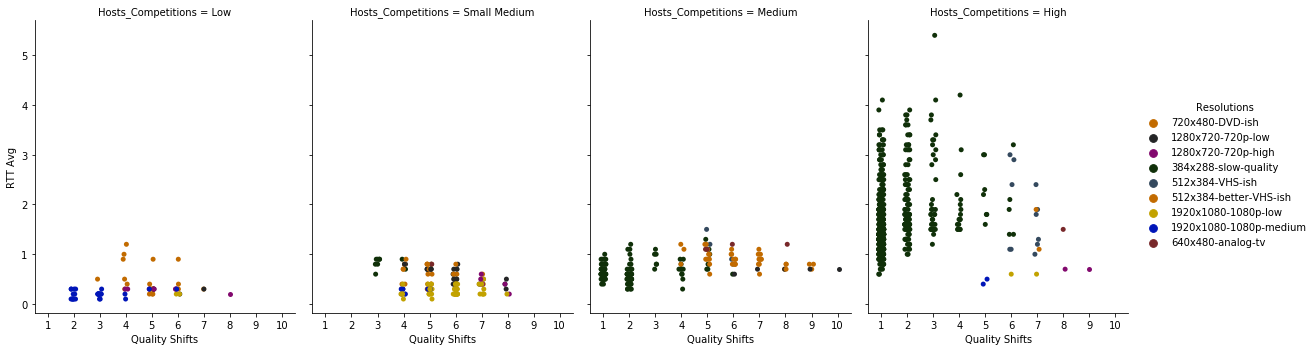

In [128]:
g = sns.catplot(x="Shifts_Quality", y="RTT_avg", col="Hosts_Competitions",palette=myP, data=dataset, hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Avg")

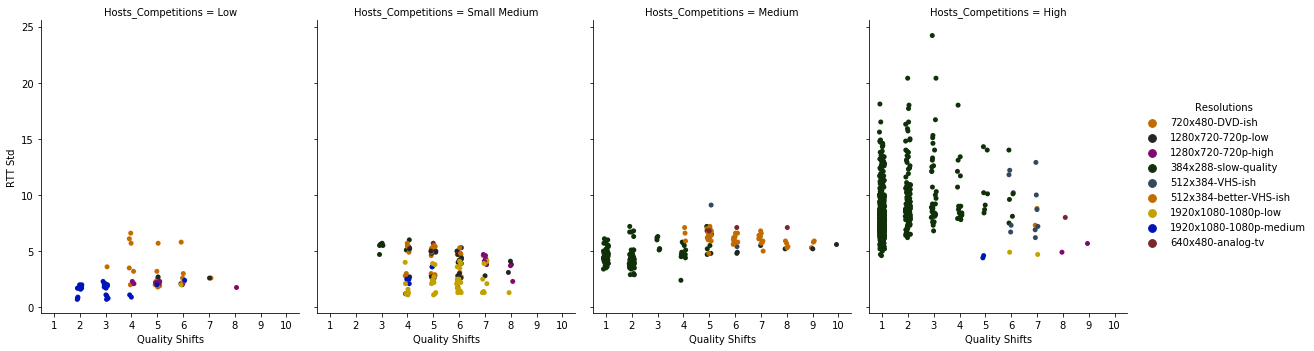

In [129]:
g = sns.catplot(x="Shifts_Quality", y="RTT_stdev", col="Hosts_Competitions",palette=myP, data=dataset,hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Std")

In [130]:
#dataset['RTT_stdev'] = dataset['RTT_stdev'].astype(np.int64)

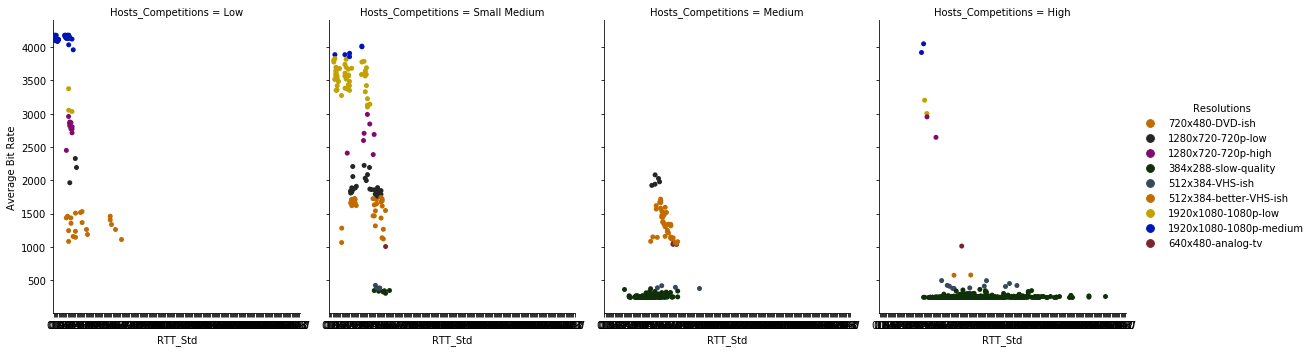

In [131]:
g = sns.catplot(x="RTT_stdev", y="Avg_Bit_Rate", col="Hosts_Competitions", palette=myP,data=dataset, height=5, aspect=.8,hue="Resolutions")
g.set_axis_labels("RTT_Std", "Average Bit Rate")

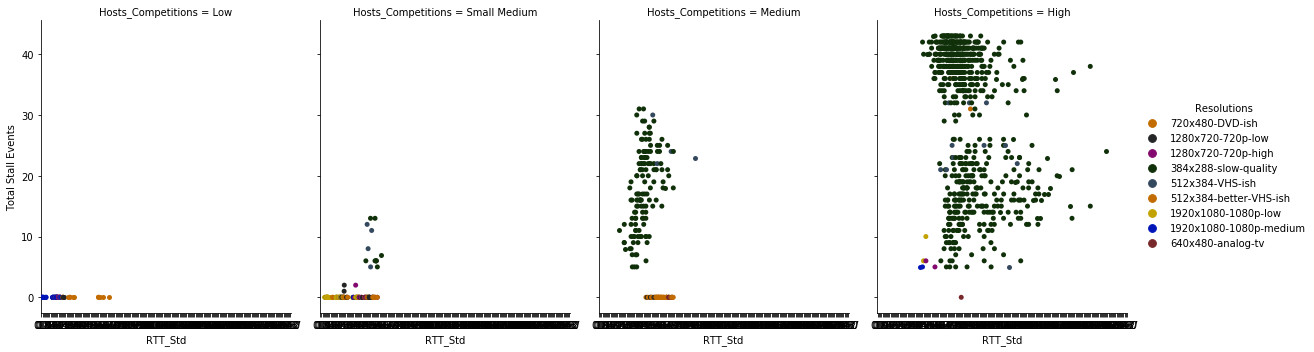

In [132]:
g = sns.catplot(x="RTT_stdev", y="Total_Stall_Events",col="Hosts_Competitions", palette=myP,data=dataset, hue="Resolutions", height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Total Stall Events")

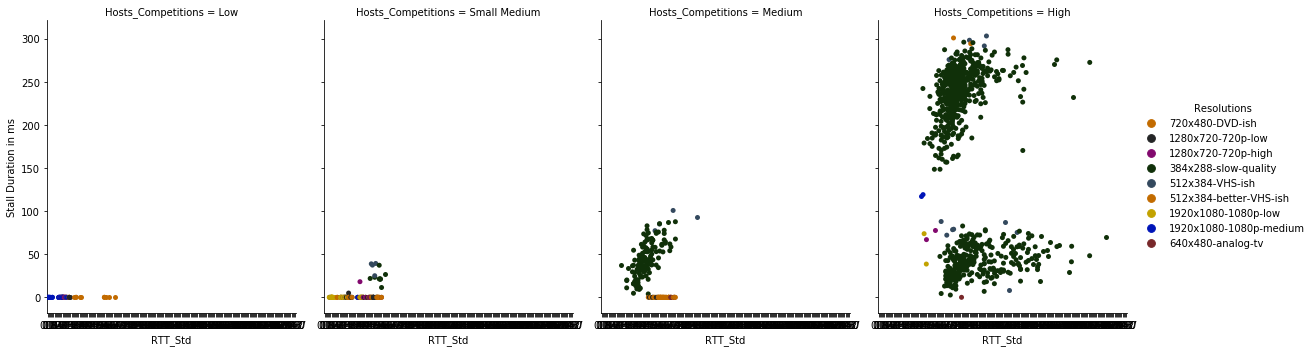

In [133]:
g = sns.catplot(x="RTT_stdev", y="Total_Stalls", hue="Resolutions",col="Hosts_Competitions",palette=myP,data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Stall Duration in ms")

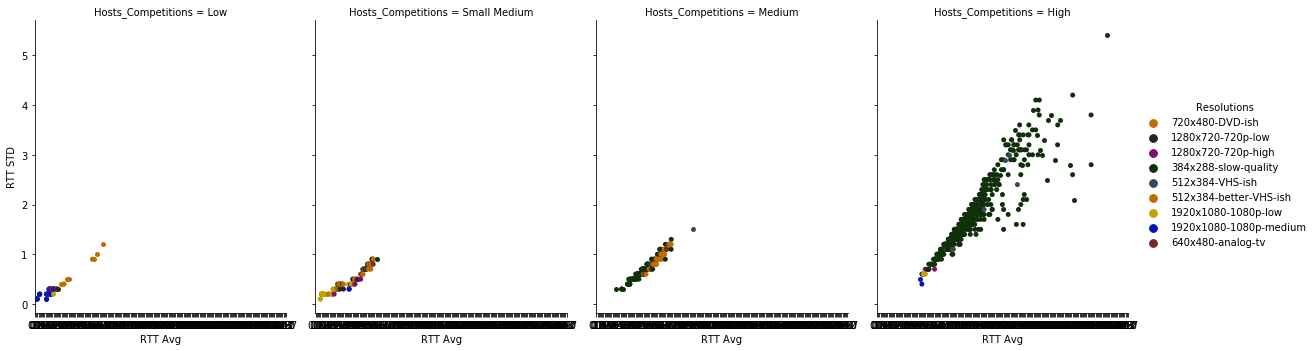

In [134]:
g = sns.catplot(x="RTT_stdev", y="RTT_avg",col="Hosts_Competitions", hue="Resolutions",palette=myP, data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT Avg", "RTT STD")

In [135]:
#dataset1 = pd.read_csv("data/30AUG.csv")

In [ ]:

#X = dataset[['RTT_avg', 'RTT_stdev', 'Triple_dupacks','Max_retrans','Min_retr_time','Max_retr_time','Avg_retr_time','Sdv_retr_time','Outoforder_pkts']]
#Y = dataset['Labels']

In [ ]:
target_count = dataset.Experience.value_counts()
#print('Class 0:', target_count[0])
#print('Class 1:', target_count[1])

target_count

issue-lower    1298
good            344
normal          146
Name: Experience, dtype: int64

In [ ]:
#dataset = dataframe.values
X = dataset.iloc[:,2:12].values


array([[9.00000e-01, 5.70000e+00, 1.25700e+03, ..., 0.00000e+00,
        0.00000e+00, 3.69000e+02],
       [4.00000e-01, 3.20000e+00, 1.60900e+03, ..., 0.00000e+00,
        0.00000e+00, 7.18000e+02],
       [3.00000e-01, 2.60000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [4.20000e+00, 1.45000e+01, 1.35000e+02, ..., 0.00000e+00,
        0.00000e+00, 7.70000e+01],
       [4.00000e-01, 3.70000e+00, 2.11500e+03, ..., 1.48364e+04,
        2.04559e+04, 8.00000e+02],
       [3.70000e+00, 1.36000e+01, 2.14000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.04000e+02]])

In [ ]:
Y = dataset.iloc[:,12].values

array(['normal', 'normal', 'normal', ..., 'issue-lower', 'good',
       'issue-lower'], dtype=object)

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

acc: 92.74%
Train: 0.925, Test: 0.927


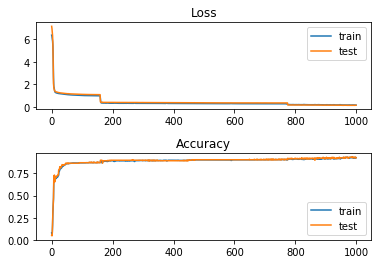

acc: 89.94%
Train: 0.907, Test: 0.899


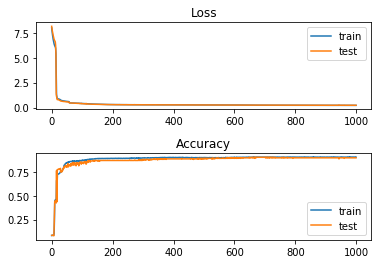

acc: 86.03%
Train: 0.867, Test: 0.860


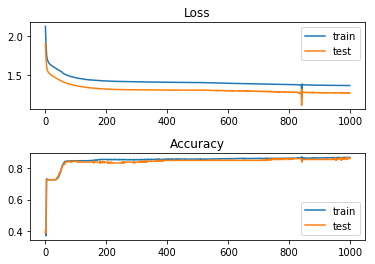

acc: 88.83%
Train: 0.911, Test: 0.888


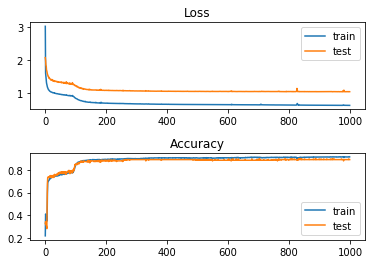

acc: 88.27%
Train: 0.886, Test: 0.883


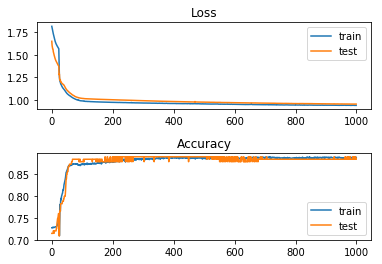

acc: 91.06%
Train: 0.924, Test: 0.911


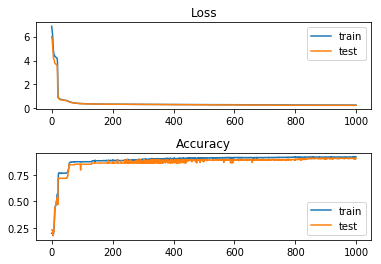

acc: 87.71%
Train: 0.847, Test: 0.877


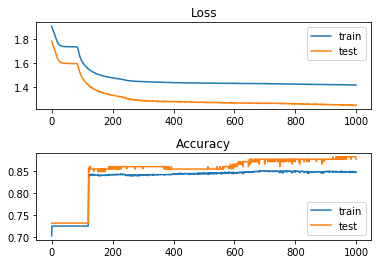

acc: 57.54%
Train: 0.587, Test: 0.575


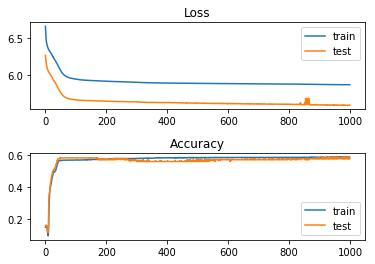

acc: 94.38%
Train: 0.937, Test: 0.944


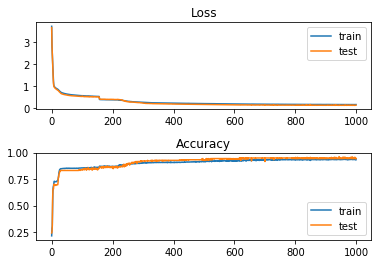

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(5, input_dim=10, activation='relu'))
	model.add(Dense(5, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	history = model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=1000, batch_size=128, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=2)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
	_, train_acc = model.evaluate(X[train], Y[train], verbose=2)
	_, test_acc = model.evaluate(X[test], Y[test], verbose=2)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	plt.subplots_adjust(hspace=0.5)
# plot loss during training
	plt.subplot(211)
	plt.title('Loss')
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.legend()
# plot accuracy during training
	plt.subplot(212)
	plt.title('Accuracy')
	plt.plot(history.history['acc'], label='train')
	plt.plot(history.history['val_acc'], label='test')
	plt.legend()
	plt.show()
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
y_pred = model.predict(X[test])

In [ ]:
#y_pred = (y_pred > 0.5) 

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y[test].argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
cm

In [ ]:
print(classification_report(Y[test].argmax(axis=1),y_pred.argmax(axis=1)))

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

In [ ]:
import cufflinks as cf

In [ ]:
# For Notebooks
init_notebook_mode(connected=True)

In [ ]:
# For offline use
cf.go_offline()

In [ ]:
dataset.iplot()